Machine Learning Introduction
---
![ML Diagram](https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto/gigs/75648476/original/f303394129c0b6352c43235b6fae39b522b1dfb8/do-regression-classification-or-machine-learning-modelling.png)

Syllabus
---
1. Setups & Machine Learning Introduction 
2. Transfer Learning
3. RNN & LSTM, training technique ( BN, regularization, dropout, augmentation ) & Tensorboard
4. Detection & Segmentation ( Yolo2 )
5. Reinforcement Learning ( DQN & gym )
6. Reinforcement Learning ( A3C )
7. Generative Model ( Auto-encoder & GAN & DCGAN )
8. Jetson TX2 setup & Test TensorRT
9. Paper Review

Today's Contents
---
1. PyTorch Tutorial with Linear Regression
2. Classificaion
3. SVM
4. Multi-layer Neural Network

Reference
---
- [Andrew Ng holehouse Deep Learning Lecture Note](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html)
- [Andrew Ng UFLDL Tutorial](http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/)
- [PyTorch github](https://github.com/pytorch/examples)
- [Choosing a Machine Learning Framework in 2018](https://agi.io/2018/02/09/survey-machine-learning-frameworks/)

PyTorch Tutorial with Linear Regression
---
![](https://cdn-images-1.medium.com/max/1600/1*eLfDr8eXnYKY-VELQXmnSg.png)

\begin{align}J(\theta) = \sum_{i=1} (h_\theta(x_i)-y_i)^2\end{align}
\begin{align}\theta^* = \arg\min_\theta J(\theta)\end{align}


In [11]:
import torch
import torch.autograd
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
from itertools import count

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)

def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target.item()

def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result

def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return x, y


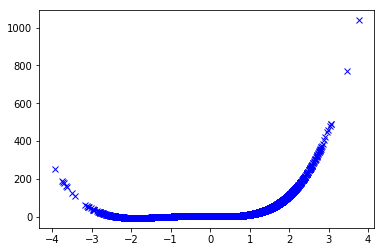

Loss: 0.000352 after 325 batches
==> Learned function:	y = -2.65 x^4 +0.77 x^3 +8.09 x^2 +3.00 x^1 +2.36
==> Actual function:	y = -2.63 x^4 +0.82 x^3 +8.08 x^2 +3.00 x^1 +2.34


In [41]:
# Define model
fc = torch.nn.Linear(W_target.size(0), 1)

data_x = []
data_y = []

for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch()
    data_x = np.append(data_x, batch_x.cpu().numpy()[:,0])
    data_y = np.append(data_y, batch_y.cpu().numpy())
    
    # Reset gradients
    fc.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    loss = output.item()

    # Backward pass
    output.backward()

    # Apply gradients
    for param in fc.parameters():
        param.data.add_(-0.1 * param.grad.data)

    # Stop criterion
    if loss < 1e-3:
        break

plt.plot(data_x, data_y, 'bx')
plt.show()

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.view(-1), fc.bias))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

Classification - SVM (Support Vector Machine)
---
![](http://dblab.xmu.edu.cn/blog/wp-content/uploads/2016/12/svm-400x400.png)
\begin{align}\min ||W||^2 \end{align}
\begin{align}Y_i(WX_i+b) \geq 1\end{align}
![](https://image.slidesharecdn.com/lecture12-090302042410-phpapp02/95/lecture12-svm-16-728.jpg?cb=1235978290)
![](https://image.slidesharecdn.com/lecture12-090302042410-phpapp02/95/lecture12-svm-17-728.jpg?cb=1235978290)
![](https://image.slidesharecdn.com/lecture12-090302042410-phpapp02/95/lecture12-svm-19-728.jpg?cb=1235978290)

(Reference: [Albert Orriols-Puig Slide Note, Lecture12 - SVM](https://www.slideshare.net/aorriols/lecture12-svm))

Neural Network
---
![](https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png?x31195)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


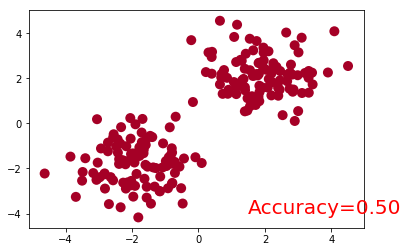

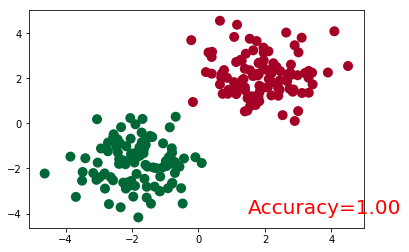

In [46]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()